In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load dataset
df_ml = pd.read_csv('/content/drive/MyDrive/Preprocessing_68/processed_selected_features.csv',parse_dates=['datetime'], index_col='datetime')

In [6]:
# Feature columns (engineered ones)
feature_cols = ['lag_1','lag_60','lag_1440','roll_mean_60','roll_std_60',]

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml[feature_cols])

In [8]:
# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.59776376 0.1589831  0.13449555 0.08799656 0.02076103]
Total variance explained: 1.0


In [9]:
# Create PCA DataFrame
pca_df = pd.DataFrame(X_pca, index=df_ml.index, columns=[f'PC{i+1}' for i in range(5)])

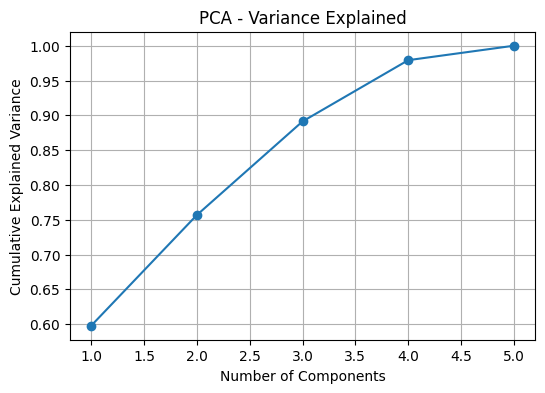

In [10]:
# Plot variance explained
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Preprocessing_68/eda_visualizations/pca_variance.png',
            dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Combine original + selected engineered + PCA components
original_features = ['Global_active_power','Global_reactive_power','Voltage',
                     'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

# Load top_features list
top_features = ['lag_1','lag_60','lag_1440','roll_mean_60','roll_std_60']  # placeholder
trimmed_df = pd.concat([df_ml[original_features + top_features], pca_df], axis=1)

In [12]:
# Save final dataset
output_file = '/content/drive/MyDrive/Preprocessing_68/processed_with_pca.csv'
trimmed_df.to_csv(output_file, index=True)

print("Final dataset with PCA saved to:", output_file)

Final dataset with PCA saved to: /content/drive/MyDrive/Preprocessing_68/processed_with_pca.csv
